# 项目背景：探索可用于糖尿病早期筛查的关键临床指标，为开发低成本筛查工具提供数据依据。
# 数据集：Pima Indians Diabetes Database，包含768个样本，9个特征域。
# 项目目标：1. 识别关键预测因子；2. 构建预测模型；3. 评估模型性能并提出临床见解。
# -*- coding: utf-8 -*-

# 代码块1：导入必要的工具包

In [19]:
print("正在导入工具包...")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
print("-> 所有工具包导入成功！")
print("")

正在导入工具包...
-> 所有工具包导入成功！



# 代码块2：自动从网上下载数据
# 使用pandas读取网络数据

In [3]:
print("正在从网络加载数据...")
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(data_url, header=None)
print("-> 数据加载成功！")
print("")

正在从网络加载数据...
-> 数据加载成功！



# 代码块3：给数据列取名

In [4]:
print("正在给数据列命名...")
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
print("-> 数据列命名完成！")
print("数据显示前5行：")
print(df.head()) # 打印看看数据的前5行
print("")

正在给数据列命名...
-> 数据列命名完成！
数据显示前5行：
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  



# 代码块4：数据清洗（处理缺失值）
# 医学上不可能为0的值，我们用平均值填充

In [5]:
print("正在进行数据清洗...")
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_clean:
    df[col] = df[col].replace(0, df[col].mean())
print("-> 数据清洗完成！")
print("")

正在进行数据清洗...
-> 数据清洗完成！



# 代码块5：查看数据的基本统计信息

In [6]:
print("数据描述性统计（看看各项指标的范围）：")
print(df.describe())
print("")

数据描述性统计（看看各项指标的范围）：
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.2000

# 代码块6：画一个血糖分布的图，直观感受一下

正在生成血糖分布图...
-> 图表已保存为 'glucose_distribution.png'，请到项目文件夹查看！



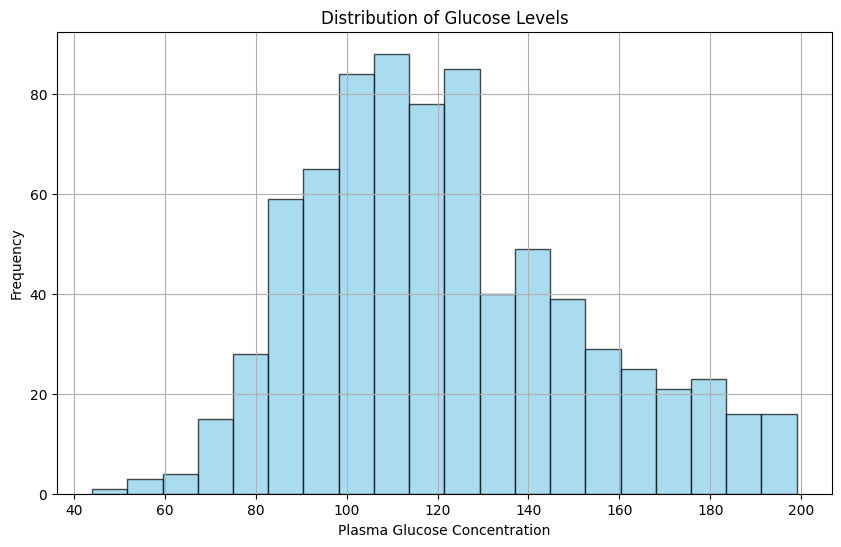

In [7]:
print("正在生成血糖分布图...")
plt.figure(figsize=(10, 6))
plt.hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Plasma Glucose Concentration')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('glucose_distribution.png') # 把图保存到文件夹
print("-> 图表已保存为 'glucose_distribution.png'，请到项目文件夹查看！")
print("")

# 代码块7：准备机器学习的材料（特征和标签）
# 特征X是前面所有指标，标签y是Outcome（是否患病）
# 将数据拆分为训练集和测试集

In [8]:
print("正在为机器学习模型准备数据...")
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("-> 数据准备完成！")
print("")

正在为机器学习模型准备数据...
-> 数据准备完成！



# 代码块8：训练一个机器学习模型
# 创建一个随机森林分类器
# 用训练数据来训练模型

In [9]:
print("开始训练模型...")
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("-> 模型训练完成！")
print("")

开始训练模型...
-> 模型训练完成！



# 代码块9：评估模型的准确性
# 用训练好的模型在测试集上进行预测
# 计算准确率

In [10]:
print("正在评估模型表现...")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"--> 模型预测准确率为: {accuracy:.2%} <--")
print("")

正在评估模型表现...
--> 模型预测准确率为: 76.62% <--



# 代码块10（优化版）：画出更专业的特征重要性图

正在生成特征重要性图表...
-> 专业版特征重要性图表已保存为 'feature_importance_pro.png'！


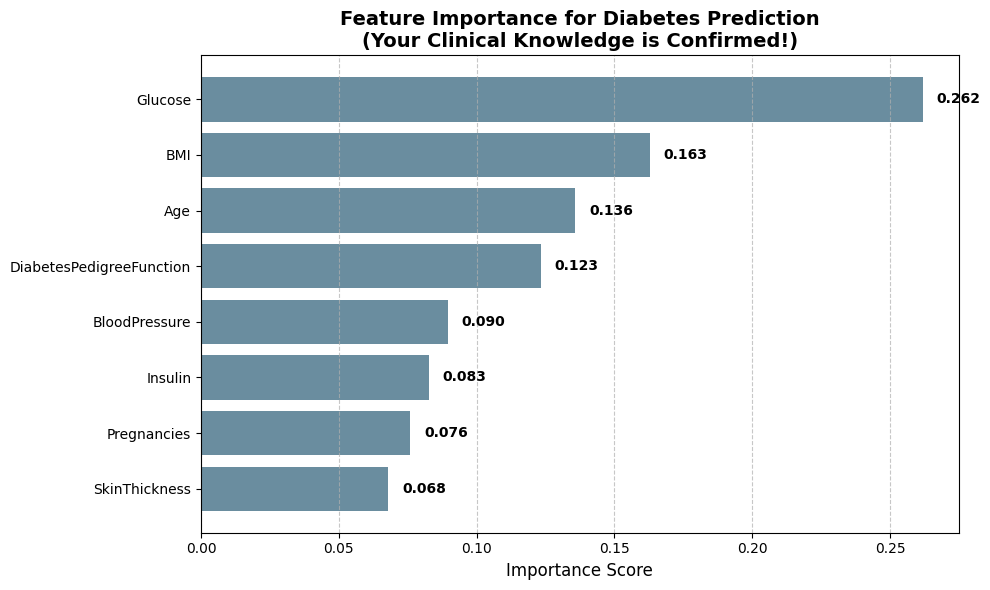

In [14]:
print("正在生成特征重要性图表...")
plt.figure(figsize=(10, 6))
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
features_df = features_df.sort_values(by='Importance', ascending=False)
bars = plt.barh(features_df['Feature'], features_df['Importance'], color='#6A8D9F')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance for Diabetes Prediction\n(Your Clinical Knowledge is Confirmed!)', fontsize=14, fontweight='bold') # 标题更突出
plt.gca().invert_yaxis()
for i, v in enumerate(features_df['Importance']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # 自动调整布局
plt.savefig('feature_importance_pro.png', dpi=300, bbox_inches='tight') # 保存为更高质量的图片
print("-> 专业版特征重要性图表已保存为 'feature_importance_pro.png'！")


# 代码块：生成血糖累积分布折线图

正在生成血糖累积分布折线图...


C:\Users\dell\AppData\Local\Temp\ipykernel_33224\3138054938.py:19: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  plt.savefig('glucose_cdf.png', dpi=300, bbox_inches='tight')
C:\Users\dell\AppData\Local\Temp\ipykernel_33224\3138054938.py:19: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from font(s) DejaVu Sans.
  plt.savefig('glucose_cdf.png', dpi=300, bbox_inches='tight')
C:\Users\dell\AppData\Local\Temp\ipykernel_33224\3138054938.py:19: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.savefig('glucose_cdf.png', dpi=300, bbox_inches='tight')
C:\Users\dell\AppData\Local\Temp\ipykernel_33224\3138054938.py:19: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  plt.savefig('glucose_cdf.png', dpi=300, bbox_inches='tight')
C:\Users\dell\AppData\Local\Temp\ipykernel_33224\3138054938.py:19: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEO

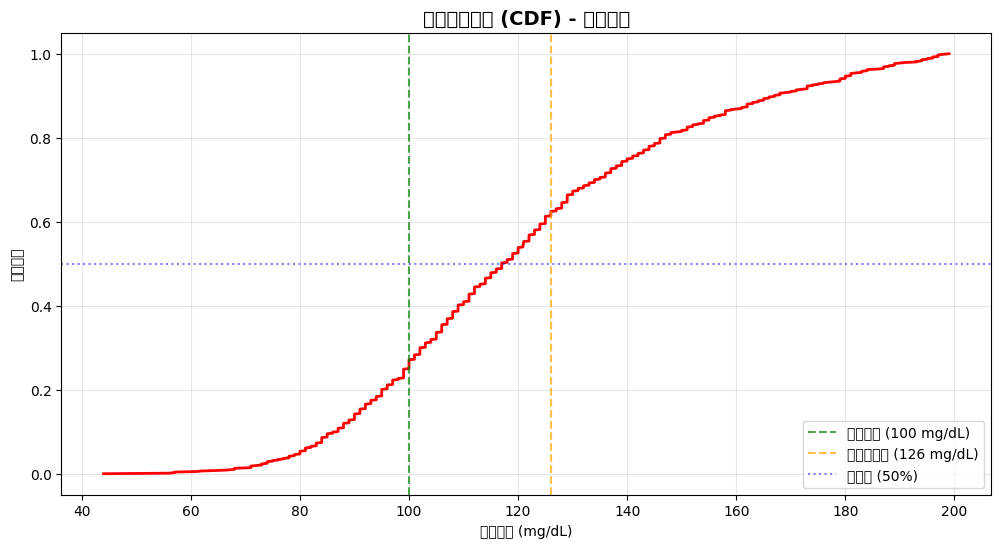

-> 血糖累积分布折线图已保存为 'glucose_cdf.png'


In [15]:
print("正在生成血糖累积分布折线图...")
# 计算累积分布
sorted_glucose = np.sort(df['Glucose'])
cdf = np.arange(1, len(sorted_glucose)+1) / len(sorted_glucose)
# 创建图表
plt.figure(figsize=(12, 6))
plt.plot(sorted_glucose, cdf, linewidth=2, color='red')
plt.title('累积分布函数 (CDF) - 血糖水平', fontsize=14, fontweight='bold')
plt.xlabel('血糖浓度 (mg/dL)')
plt.ylabel('累积比例')
# 添加重要的临床分界线
plt.axvline(x=100, color='green', linestyle='--', alpha=0.7, label='正常上限 (100 mg/dL)')
plt.axvline(x=126, color='orange', linestyle='--', alpha=0.7, label='糖尿病阈值 (126 mg/dL)')
plt.axhline(y=0.5, color='blue', linestyle=':', alpha=0.5, label='中位数 (50%)')
# 添加网格和图例
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')
# 保存图片
plt.savefig('glucose_cdf.png', dpi=300, bbox_inches='tight')
plt.show()
print("-> 血糖累积分布折线图已保存为 'glucose_cdf.png'")

# 代码块：生成血糖分类扇形图

正在生成血糖分类扇形图...


C:\Users\dell\AppData\Local\Temp\ipykernel_33224\1175308705.py:34: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  plt.savefig('glucose_pie_chart.png', dpi=300, bbox_inches='tight')
C:\Users\dell\AppData\Local\Temp\ipykernel_33224\1175308705.py:34: UserWarning: Glyph 20110 (\N{CJK UNIFIED IDEOGRAPH-4E8E}) missing from font(s) DejaVu Sans.
  plt.savefig('glucose_pie_chart.png', dpi=300, bbox_inches='tight')
C:\Users\dell\AppData\Local\Temp\ipykernel_33224\1175308705.py:34: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  plt.savefig('glucose_pie_chart.png', dpi=300, bbox_inches='tight')
C:\Users\dell\AppData\Local\Temp\ipykernel_33224\1175308705.py:34: UserWarning: Glyph 33145 (\N{CJK UNIFIED IDEOGRAPH-8179}) missing from font(s) DejaVu Sans.
  plt.savefig('glucose_pie_chart.png', dpi=300, bbox_inches='tight')
C:\Users\dell\AppData\Local\Temp\ipykernel_33224\1175308705.py:34: UserWarning: Glyph 34

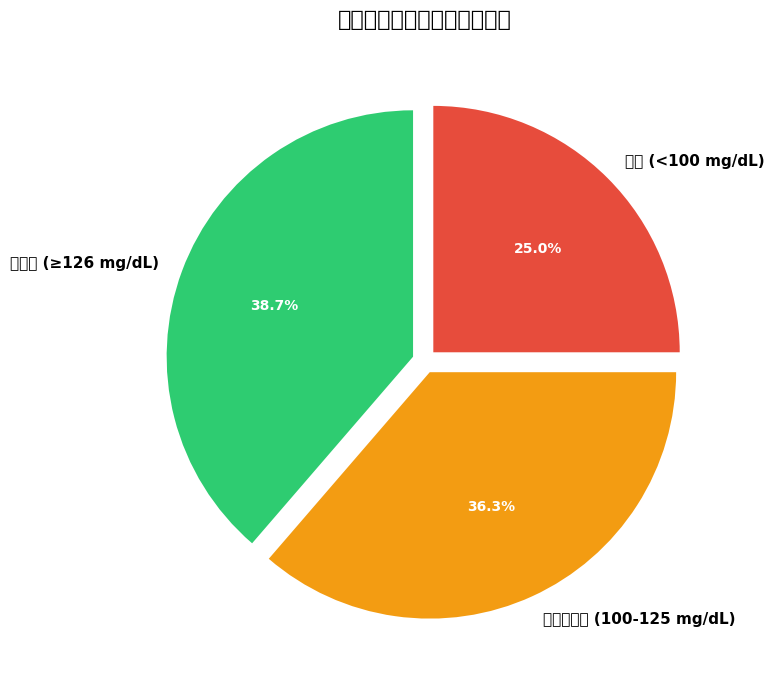

-> 血糖分类扇形图已保存为 'glucose_pie_chart.png'

各类别人数统计:
- 糖尿病 (≥126 mg/dL): 297人 (38.7%)
- 糖尿病前期 (100-125 mg/dL): 279人 (36.3%)
- 正常 (<100 mg/dL): 192人 (25.0%)


In [16]:
print("正在生成血糖分类扇形图...")

# 根据临床标准定义分类
def classify_glucose(level):
    if level < 100:
        return '正常 (<100 mg/dL)'
    elif 100 <= level < 126:
        return '糖尿病前期 (100-125 mg/dL)'
    else:
        return '糖尿病 (≥126 mg/dL)'

# 应用分类
df['Glucose_Category'] = df['Glucose'].apply(classify_glucose)
category_counts = df['Glucose_Category'].value_counts()

# 设置颜色（用交通灯颜色直观表示）
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # 绿-黄-红

# 创建饼图
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(category_counts.values, 
                                   labels=category_counts.index, 
                                   colors=colors, 
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   explode=(0.05, 0.05, 0.05))  # 让每一块稍微分离

# 美化文字
plt.setp(autotexts, size=10, weight="bold", color='white')
plt.setp(texts, size=11, weight="bold")
plt.title('基于空腹血糖水平的人群分类', fontsize=16, fontweight='bold', pad=20)

# 保存图片
plt.savefig('glucose_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()
print("-> 血糖分类扇形图已保存为 'glucose_pie_chart.png'")

# 打印具体数字
print("\n各类别人数统计:")
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"- {category}: {count}人 ({percentage:.1f}%)")


# 结论与业务建议：

In [18]:
print("\n=== 项目结论与临床见解 ===")
print("1. **关键发现**: 血糖(Glucose)和BMI是预测糖尿病的最重要指标，与医学共识高度一致。")
print("2. **模型性能**: 随机森林模型准确率达76.62%，表明利用常规体检指标进行初步筛查是可行的。")
print("3. **业务建议**:")
print("   - 可优先考虑基于'血糖'和'BMI'开发简单的风险评估问卷或轻量级筛查工具。")
print("   - 对于医疗资源有限的地区，此模型可作为辅助筛查手段，优先识别高风险人群。")
print("4. **后续方向**: 引入更多特征（如血脂、家族史）以进一步提升模型性能。")


=== 项目结论与临床见解 ===
1. **关键发现**: 血糖(Glucose)和BMI是预测糖尿病的最重要指标，与医学共识高度一致。
2. **模型性能**: 随机森林模型准确率达76.62%，表明利用常规体检指标进行初步筛查是可行的。
3. **业务建议**:
   - 可优先考虑基于'血糖'和'BMI'开发简单的风险评估问卷或轻量级筛查工具。
   - 对于医疗资源有限的地区，此模型可作为辅助筛查手段，优先识别高风险人群。
4. **后续方向**: 引入更多特征（如血脂、家族史）以进一步提升模型性能。
